In [119]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [120]:
np.random.seed(2025)
theta = np.pi / 3
n = 400
rotar = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])
x = np.concat([np.random.randn(n//2, 2) @ np.diag([2, .5]) @ rotar,
               np.random.randn(n//2, 2) @ np.diag([1.5, .5]) @ rotar + np.array([3.8, 4])])
# Mencionar varianza y otras proyecciones

Sigo sin mencionar el porque de la varianza

In [121]:
c: np.ndarray = x - x.mean(axis=0)
u, d, vt = np.linalg.svd(c, full_matrices=False)
scores = u @ np.diag(d)

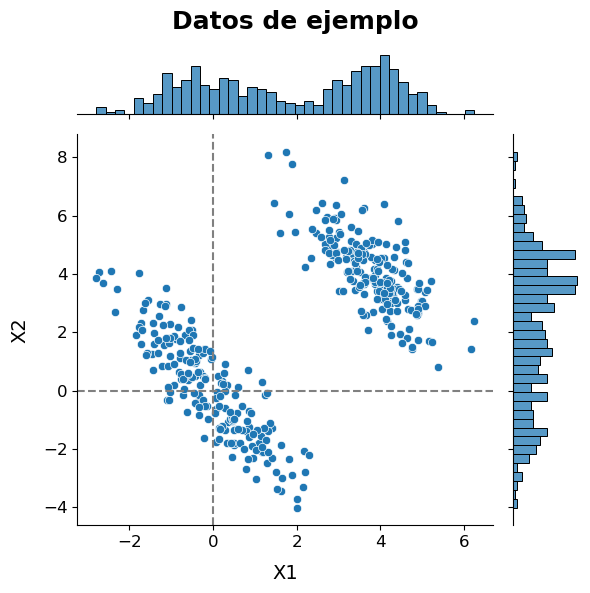

In [129]:
g = sns.jointplot(pd.DataFrame(x, columns=["x1", "x2"]), x="x1", y="x2", marginal_kws={"bins":40, "fill":True}, height=6);
g.ax_joint.axhline(0, linestyle="--", color="gray")
g.ax_joint.axvline(0, linestyle="--", color="gray");

g.figure.suptitle("Datos de ejemplo", fontsize=18, fontweight="bold")
g.ax_joint.set_xlabel("X1", fontsize=14, labelpad=10)
g.ax_joint.set_ylabel("X2", fontsize=14, labelpad=10)
g.ax_joint.tick_params(axis='both', labelsize=12)

g.figure.tight_layout();
g.figure.savefig("img/ejemplo2.png", dpi=300, bbox_inches="tight")

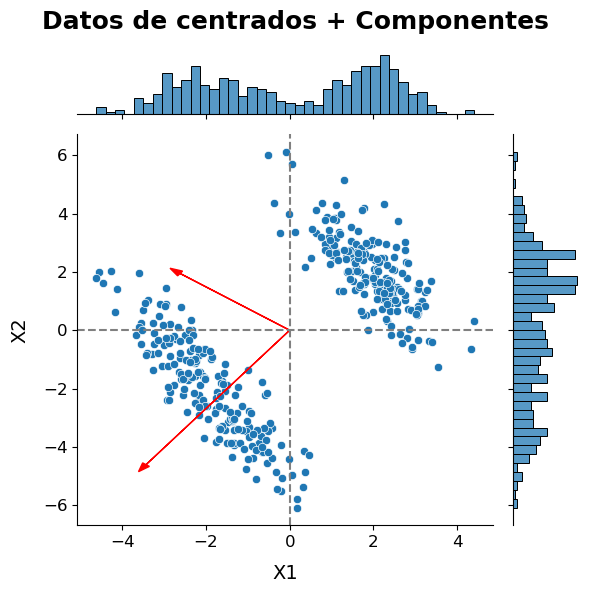

In [130]:
g = sns.jointplot(pd.DataFrame(c, columns=["x1", "x2"]), x="x1", y="x2", marginal_kws={"bins":40, "fill":True}, height=6);
g.ax_joint.axhline(0, linestyle="--", color="gray")
g.ax_joint.axvline(0, linestyle="--", color="gray");

loadings = vt.T
for row in range(loadings.shape[0]):
    g.ax_joint.arrow(0, 0,
                loadings[row, 0] * d[row] * 0.1, loadings[row, 1] * d[row] * 0.1,
                head_width=0.2,
                color="red")

g.figure.suptitle("Datos de centrados + Componentes", fontsize=18, fontweight="bold")
g.ax_joint.set_xlabel("X1", fontsize=14, labelpad=10)
g.ax_joint.set_ylabel("X2", fontsize=14, labelpad=10)
g.ax_joint.tick_params(axis='both', labelsize=12)

g.figure.tight_layout();
g.figure.savefig("img/ejemplo2_centrado.png", dpi=300, bbox_inches="tight")
# Varianza de proyecciones, longitud de vectores

In [124]:
scores.var(axis=0, ddof=1) / scores.var(axis=0, ddof=1).sum()

array([0.75639313, 0.24360687])

In [125]:
scores.var(axis=0, ddof=1)

array([8.27594613, 2.66538286])

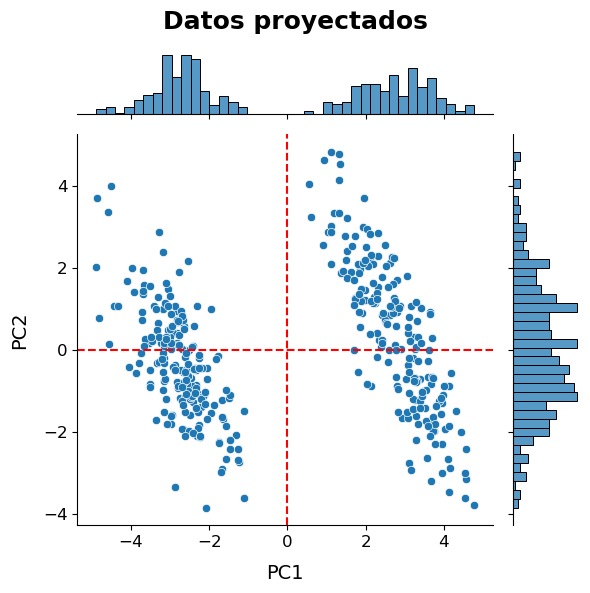

In [131]:
g = sns.jointplot(pd.DataFrame(scores, columns=["PC1", "PC2"]), x="PC1", y="PC2", marginal_kws={"bins":40, "fill":True}, height=6);

g.ax_joint.axhline(0, linestyle="--", color="red")
g.ax_joint.axvline(0, linestyle="--", color="red");

g.figure.suptitle("Datos proyectados", fontsize=18, fontweight="bold")
g.ax_joint.set_xlabel("PC1", fontsize=14, labelpad=10)
g.ax_joint.set_ylabel("PC2", fontsize=14, labelpad=10)
g.ax_joint.tick_params(axis='both', labelsize=12)

g.figure.tight_layout();
g.figure.savefig("img/ejemplo2_proyectado.png", dpi=300, bbox_inches="tight", )